<a href="https://colab.research.google.com/github/httperror505/Neural-Network/blob/main/TOLOSA_Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()

        # Define layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_size = 784
hidden_size = 128
output_size = 10


model = SimpleNN(input_size, hidden_size, output_size)


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
batch_size = 64
dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in dataloader:

        optimizer.zero_grad()


        inputs = inputs.view(-1, input_size)


        outputs = model(inputs)


        loss = criterion(outputs, labels)


        loss.backward()
        optimizer.step()

        running_loss += loss.item()


    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(dataloader)}")

print("Training complete")


torch.save(model.state_dict(), 'simple_nn_model.pth')

100%|██████████| 9912422/9912422 [00:00<00:00, 31210325.28it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 102224214.20it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 49321366.96it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18695317.73it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1/10, Loss: 0.7568060735077746
Epoch 2/10, Loss: 0.36884558744935086
Epoch 3/10, Loss: 0.3226520323248179
Epoch 4/10, Loss: 0.2957517894298664
Epoch 5/10, Loss: 0.2739406835073347
Epoch 6/10, Loss: 0.2547546176752175
Epoch 7/10, Loss: 0.2369783925516074
Epoch 8/10, Loss: 0.2217452320605834
Epoch 9/10, Loss: 0.20690298510957628
Epoch 10/10, Loss: 0.1943901038682982
Training complete


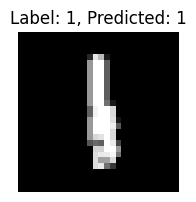

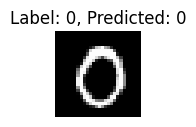

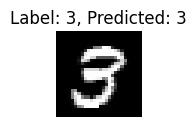

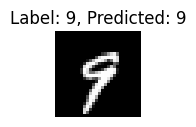

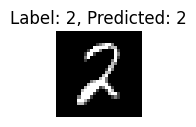

In [ ]:
import matplotlib.pyplot as plt

# Plot some sample images from the dataset

sample_loader = DataLoader(train_dataset,
batch_size=5, shuffle=True)

data_iter = iter(sample_loader)

images, labels = next(data_iter)

# Make predictions using the trained model

model.eval()

with torch.no_grad():

  images = images.view(-1, input_size)
  predictions = model(images)
  _, predicted_labels = torch.max(predictions, 1)

  # Plot the sample images with their predicted labels

plt.figure(figsize=(12, 6))

for i in range(5):

  plt.subplot(1, 5, i + 1)
  plt.imshow(images[i].view(28, 28).cpu().numpy(), cmap='gray')
  plt.title(f"Label: {labels[i]}, Predicted: {predicted_labels[i]}")
  plt.axis('off')
  plt.show()

# Save the trained model

torch.save(model.state_dict(), 'simple_nn_model.pth')